In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [46]:
df = pd.read_csv('/content/onlinefoods (1).csv')
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [47]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [49]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

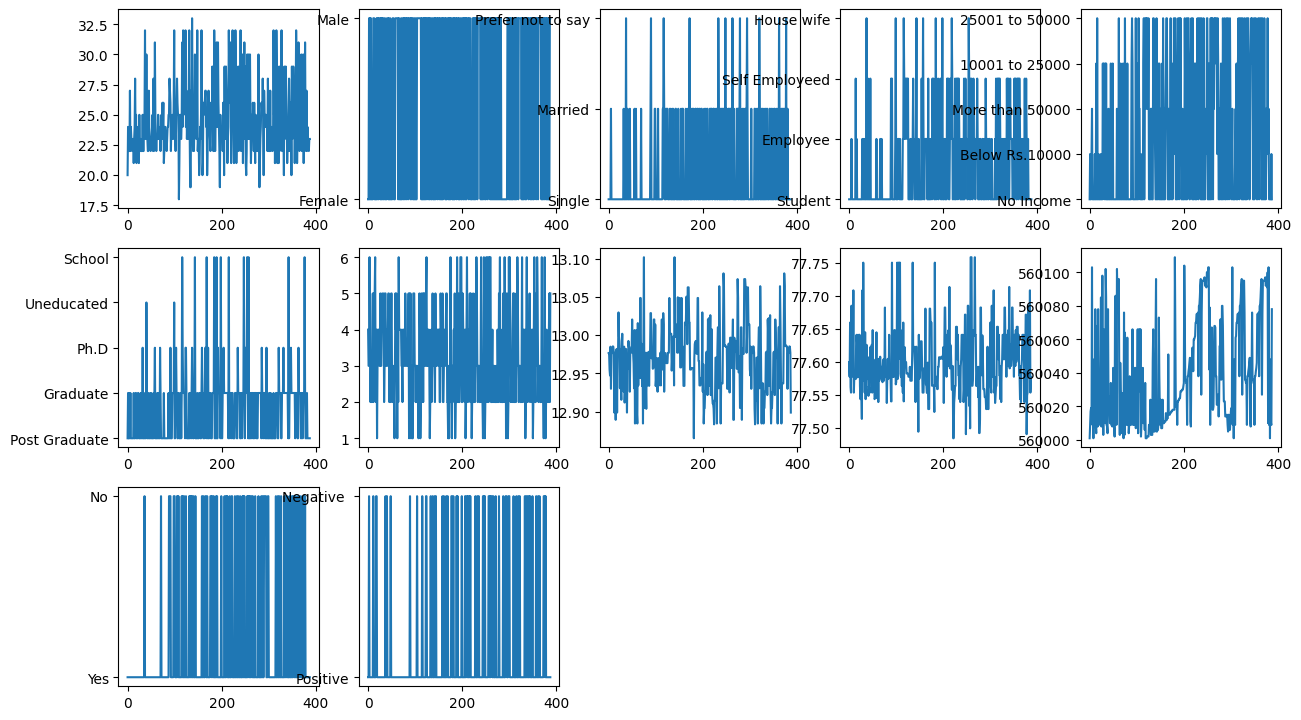

In [50]:
plt.figure(figsize = (15,15))
pl = 1
for i in df.columns:
  if pl <=12:
    plt.subplot(5,5,pl)
    plt.plot(df[i])
  pl+=1
plt.show()

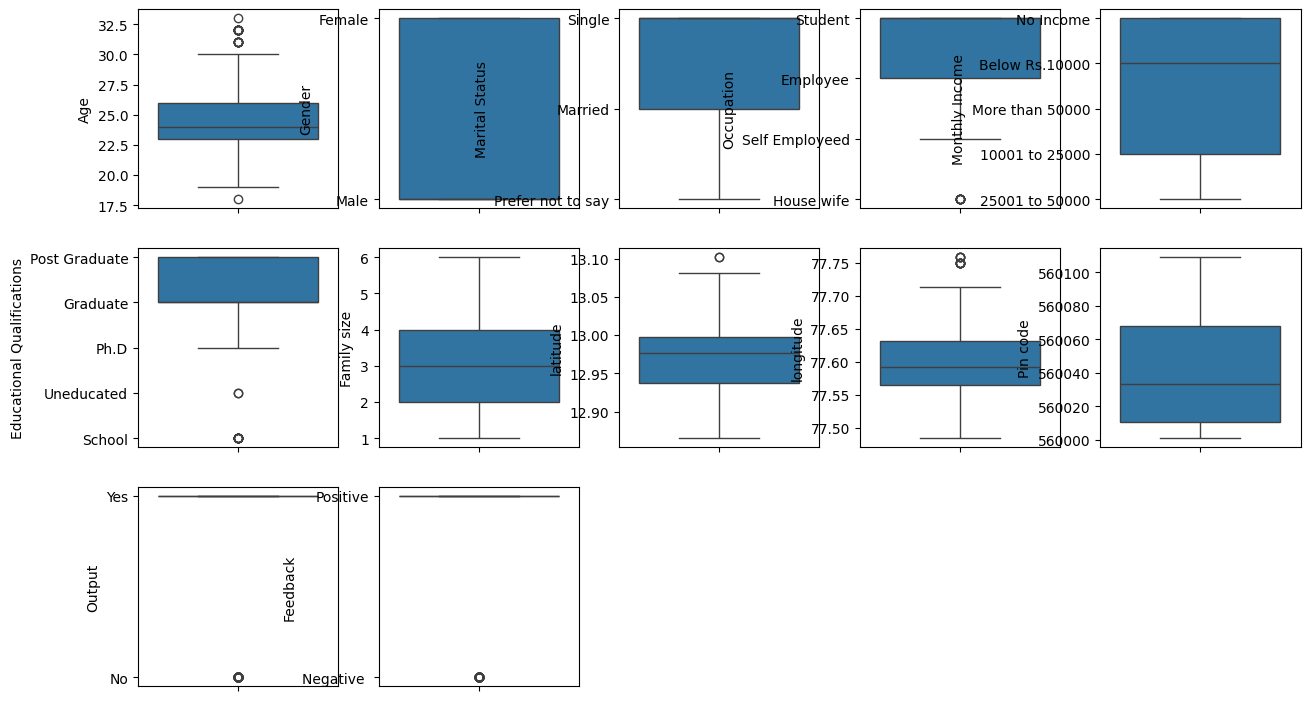

In [51]:
plt.figure(figsize = (15,15))
pl = 1
for i in df.columns:
  if pl <=12:
    plt.subplot(5,5,pl)
    sns.boxplot(df[i])
  pl+=1
plt.show()

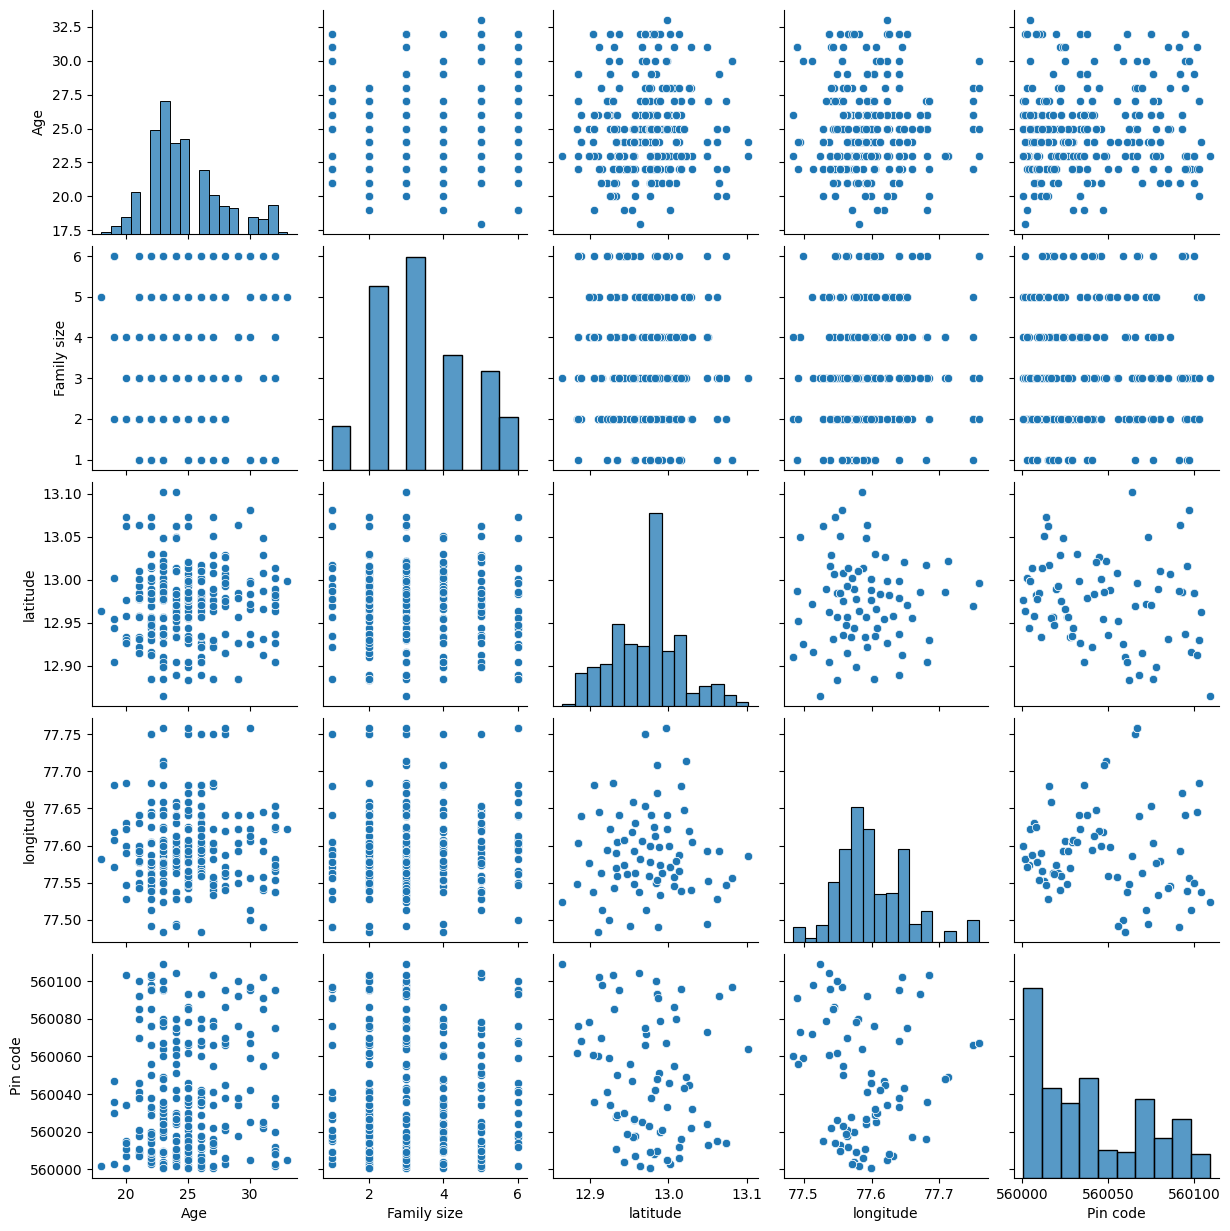

In [52]:
sns.pairplot(df)

In [53]:
cate = df.select_dtypes(include = object).columns
cate

Index(['Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

In [54]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
for i in cate:
  df[i] = lbl.fit_transform(df[i])


<Axes: >

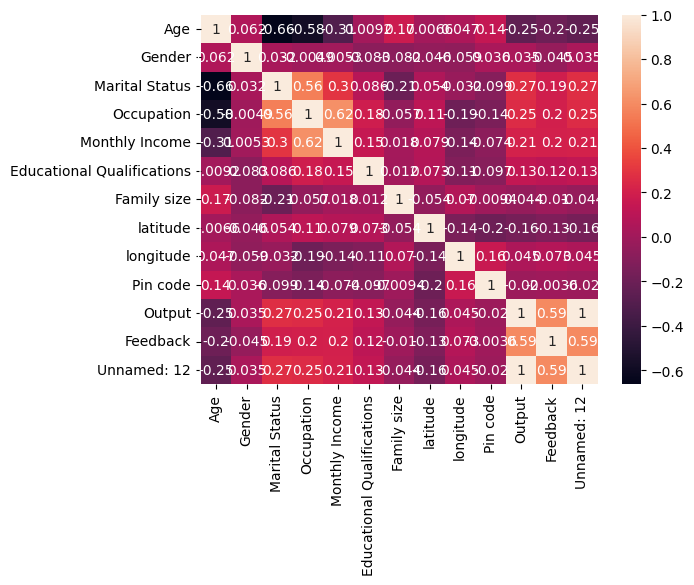

In [55]:

crr = df.corr()
sns.heatmap(crr,annot = True)

In [56]:
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,1,1,1
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,1,1,1
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,1,0,1
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,1,1,1
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,0,2,3,4,2,2,12.9766,77.5993,560001,1,1,1
384,23,0,2,3,4,2,4,12.9854,77.7081,560048,1,1,1
385,22,0,2,3,4,2,5,12.9850,77.5533,560010,1,1,1
386,23,1,2,3,2,2,2,12.9770,77.5773,560009,1,1,1


In [57]:
X = df.drop('Feedback',axis =1)
Y = df['Feedback']

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y)


In [59]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test =st.fit_transform(x_test)

In [60]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape= (12,)),
    keras.layers.Dense(25,activation = 'relu'),
    keras.layers.Dense(15,activation = 'relu'),
    keras.layers.Dense(2,activation = 'sigmoid')
])

In [61]:
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics =['accuracy'])

In [62]:
history = model.fit(x_train,y_train,validation_split= .1,epochs =17)


Epoch 1/17
9/9 [==============================] - 1s 46ms/step - loss: 0.6669 - accuracy: 0.6284 - val_loss: 0.5398 - val_accuracy: 0.8667
Epoch 2/17
9/9 [==============================] - 0s 5ms/step - loss: 0.5923 - accuracy: 0.7471 - val_loss: 0.4980 - val_accuracy: 0.8333
Epoch 3/17
9/9 [==============================] - 0s 5ms/step - loss: 0.5395 - accuracy: 0.7931 - val_loss: 0.4784 - val_accuracy: 0.8333
Epoch 4/17
9/9 [==============================] - 0s 6ms/step - loss: 0.4995 - accuracy: 0.8046 - val_loss: 0.4644 - val_accuracy: 0.8333
Epoch 5/17
9/9 [==============================] - 0s 6ms/step - loss: 0.4659 - accuracy: 0.8046 - val_loss: 0.4516 - val_accuracy: 0.8333
Epoch 6/17
9/9 [==============================] - 0s 6ms/step - loss: 0.4359 - accuracy: 0.8084 - val_loss: 0.4438 - val_accuracy: 0.8333
Epoch 7/17
9/9 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8238 - val_loss: 0.4384 - val_accuracy: 0.8333
Epoch 8/17
9/9 [=================

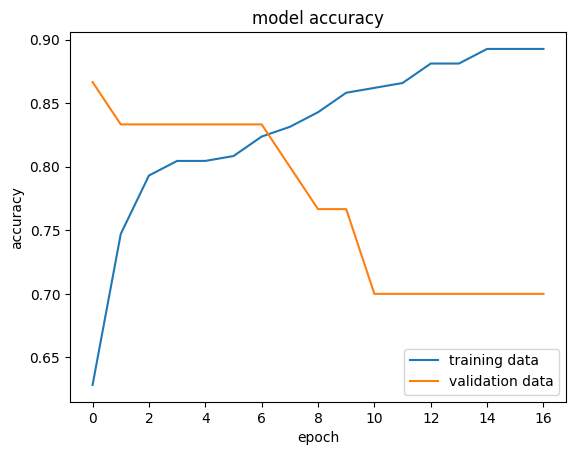

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc = 'lower right')

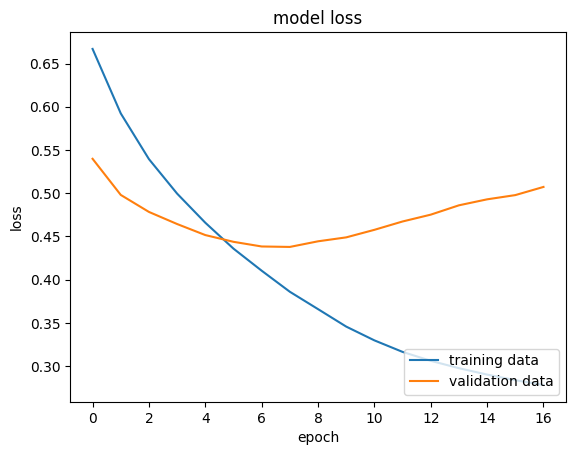

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc = 'lower right')

In [65]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis =1)
y_pred

4/4 [==============================] - 0s 3ms/step


array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1])

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8969072164948454